In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# defining a function that will help us quickly calulate an average of a list
def avgOfList(list):
    return sum(list) / len(list)

# reading in the production spreadsheet
df = pd.read_csv(r'well production.csv')
df.sort_values('well name', axis = 0)
# making list of well names
listOfWellNames = df['well name'].values
listOfFiles = []

# reading in spreadsheets of well data
for i in listOfWellNames:
    j = pd.read_csv((i + '.csv'))
    listOfFiles.append(j)
    
# creating easting and northing data to plot a map of the wells
easting = []
northing = []
for i in listOfFiles:
    easting.append(i.easting.values)
    northing.append(i.northing.values)

In [2]:
listOfFiles[0]

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,thickness (ft),proppant weight (lbs),pump rate (cubic feet/min)
0,78000.0,1600.0,0.07,0.024,0.321,5434034.964,0.085075,0.914925,22.559422,1.167381e+06,300.708062
1,78076.0,1600.0,0.08,0.026,0.321,5454122.821,0.084953,0.915047,22.710243,2.586512e+06,286.295447
2,78153.0,1600.0,0.09,0.028,0.321,5474357.295,0.084833,0.915167,22.860497,1.549828e+06,263.363298
3,78229.0,1600.0,0.09,0.028,0.321,5474357.295,0.084833,0.915167,22.860497,8.719368e+05,400.693413
4,78306.0,1600.0,0.09,0.029,0.321,5494735.116,0.084714,0.915286,23.010171,1.168557e+06,296.505463
...,...,...,...,...,...,...,...,...,...,...,...
95,85259.0,1600.0,0.04,0.009,0.332,7093843.633,0.078099,0.921901,31.217904,1.661638e+05,216.374907
96,85335.0,1600.0,0.04,0.009,0.332,7093843.633,0.078099,0.921901,31.217904,1.317816e+06,258.490214
97,85412.0,1600.0,0.07,0.017,0.332,7116690.153,0.077999,0.922001,31.291038,1.369117e+06,399.592126
98,85488.0,1600.0,0.05,0.010,0.332,7139471.873,0.077899,0.922101,31.362604,5.641754e+05,246.129655


In [3]:
# creating 2D arrays of all values for each feature, from each well file so they can be plotted later
porosity = []
permeability = []
poissonRatio = []
youngMod = []
waterSat = []
oilSat = []
thickness = []
proppWt = []
pumpRt = []

for i in listOfFiles:
    porosity.append(i.porosity.values)
    permeability.append(i.permeability.values)
    poissonRatio.append(i["Poisson's ratio"].values)
    youngMod.append(i["Young's Modulus"].values)
    waterSat.append(i['water saturation'].values)
    oilSat.append(i['oil saturation'].values)
    thickness.append(i['thickness (ft)'].values)
    proppWt.append(i['proppant weight (lbs)'].values)
    pumpRt.append(i['pump rate (cubic feet/min)'].values)

# create lists that contain average value for the feature from each well
avgNorth = []
for well in northing:
    avgNorth.append(avgOfList(well))
avgEast = []
for well in easting:
    avgEast.append(avgOfList(well))
avgPor = []
for well in porosity:
    avgPor.append(avgOfList(well))
avgPerm = []
for well in permeability:
    avgPerm.append(avgOfList(well))
avgPR = []
for well in poissonRatio:
    avgPR.append(avgOfList(well))
avgYM = []
for well in youngMod:
    avgYM.append(avgOfList(well))
avgWS = []
for well in waterSat:
    avgWS.append(avgOfList(well))
avgOS = []
for well in oilSat:
    avgOS.append(avgOfList(well))
avgThk = []
for well in thickness:
    avgThk.append(avgOfList(well))
avgPRPWT = []
for well in proppWt:
    well_mean = np.nanmean(well, axis=0)
    inds = np.where(np.isnan(well))
    well[inds] = well_mean
    avgPRPWT.append(avgOfList(well))
avgPMPRT = []
for well in pumpRt:
    well_mean = np.nanmean(well, axis=0)
    inds = np.where(np.isnan(well))
    well[inds] = well_mean
    avgPMPRT.append(avgOfList(well))

#add all these lists to dataframe as additional columns
df['average northing'] = avgNorth
df['average easting'] = avgEast
df['averagePorosity'] = avgPor
df['averagePermeability'] = avgPerm
df['average poissons ratio'] = avgPR
df['average youngs modulus'] = avgYM
df['average water saturation'] = avgWS
df['averageOilSaturation'] = avgOS
df['average thickness'] = avgThk
df['average proppant weight'] = avgPRPWT
df['average pump rate'] = avgPMPRT

In [4]:
pressure = []
dfPressures = df['average pressure (Pa)'].values
for i in range (0,len(df)):
    wellP = []
    for j in range(0,100):
        wellP.append(dfPressures[i])
    pressure.append(wellP)

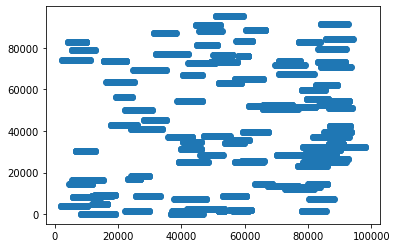

In [5]:
# map of wells
plt.scatter(easting, northing)

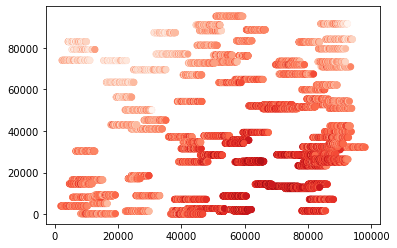

In [6]:
# map of wells colored by porosity
# high porosity at (70, 10)
plt.scatter(easting, northing, c = porosity,cmap="Reds")

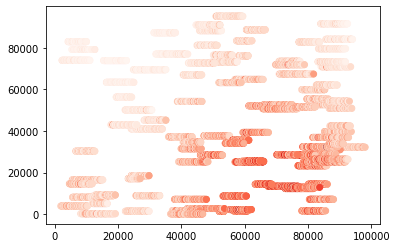

In [7]:
# map of wells colored by permeability
# looks uniform
plt.scatter(easting, northing, c = permeability, cmap = "Reds")

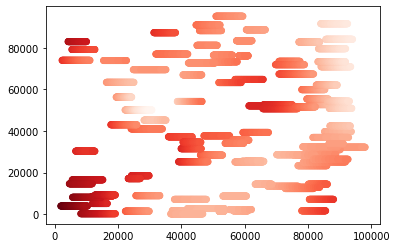

In [8]:
# map of wells colored by PR
plt.scatter(easting, northing, c = poissonRatio, cmap = "Reds")

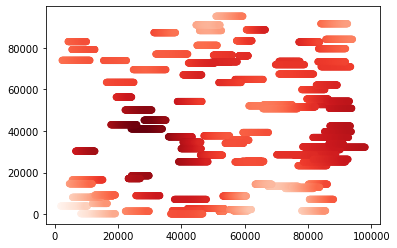

In [9]:
# map of wells colored by YM
plt.scatter(easting, northing, c = youngMod, cmap = "Reds")

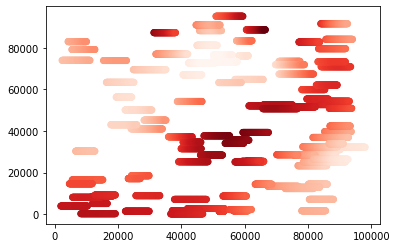

In [10]:
# map of wells colored by water saturation
plt.scatter(easting, northing, c = waterSat, cmap = "Reds")

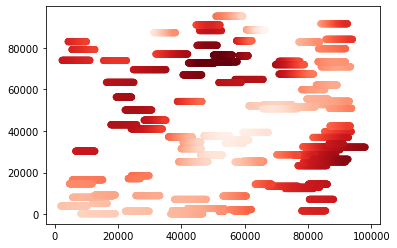

In [11]:
# map of wells colored by oil saturation
# hotspot for oil at (90, 30) and (50,70)
plt.scatter(easting, northing, c = oilSat, cmap = "Reds")

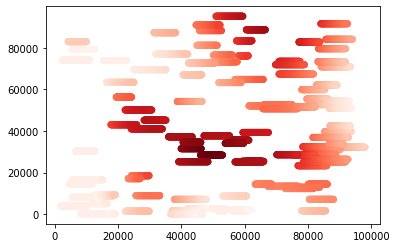

In [12]:
# map of wells colored by thickness
# thicker toward center of reservoir
plt.scatter(easting, northing, c = thickness, cmap = "Reds")

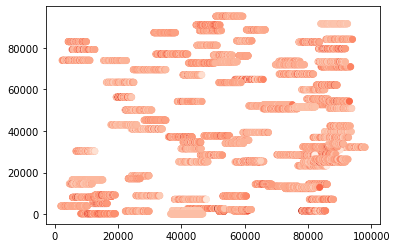

In [13]:
# map of wells colored by proppant rate
# looks uniform
plt.scatter(easting, northing, c = proppWt, cmap = "Reds")

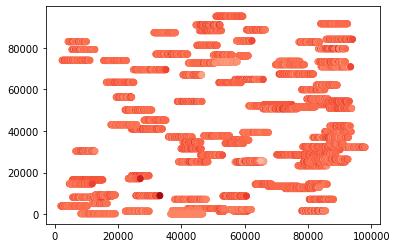

In [14]:
# map of wells colored by pump rate
# looks uniform
plt.scatter(easting, northing, c = pumpRt, cmap = "Reds")

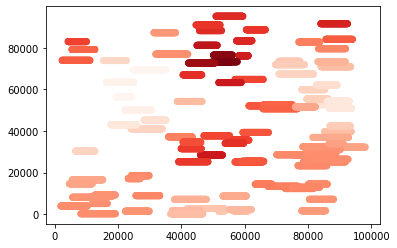

In [15]:
plt.scatter(easting, northing, c = pressure, cmap = "Reds")

In [16]:
avgRR = avgOfList(df['recovery factor'].values)
avgRR

0.09490102068043484

In [17]:
# find wells that are above 75th percentile for average porosity, oil saturation, and permeability

# 75th percentile values (cutoffs)
porosityCutoff = df['averagePorosity'].quantile(.75)
oilSatCutoff = df['averageOilSaturation'].quantile(.75)
permCutoff = df['averagePermeability'].quantile(.75)

dfCutoff = df.query('averagePorosity > @porosityCutoff and averagePermeability > @permCutoff and averageOilSaturation > @oilSatCutoff')

namesOfBest = dfCutoff['well name']
eastOfBest = dfCutoff['average easting']
northOfBest = dfCutoff['average northing']

dfCutoff

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,average easting,averagePorosity,averagePermeability,average poissons ratio,average youngs modulus,average water saturation,averageOilSaturation,average thickness,average proppant weight,average pump rate
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,84831.86,0.0717,0.02261,0.30560,1.027616e+07,0.071061,0.928939,57.315355,690947.011162,298.807597
6,State 3-95H,36312036,0.100918,1.6,320.0,321.0,310.0,281.0,269.0,217.0,...,81373.80,0.0793,0.02797,0.30788,9.374241e+06,0.069211,0.930789,69.399172,738574.184232,303.204767
16,State 3-156H,36169798,0.102831,1.6,419.0,407.0,412.0,342.0,308.0,299.0,...,85172.17,0.0746,0.02417,0.31012,9.939256e+06,0.051722,0.948278,60.933054,779959.862494,303.897585
73,Brisket 10-65H,36199370,0.097415,1.6,506.0,483.0,468.0,430.0,372.0,369.0,...,83103.15,0.0806,0.02811,0.31912,8.361116e+06,0.065860,0.934140,58.052313,843728.433578,302.781780
81,Pole 14-200H,36084417,0.104752,1.6,378.0,378.0,356.0,344.0,298.0,256.0,...,87171.71,0.0729,0.02318,0.31066,1.018940e+07,0.042053,0.957947,55.034841,771916.692130,298.543783
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,79389.72,0.0814,0.02966,0.31488,7.178213e+06,0.074205,0.925795,54.119562,692306.209005,304.578816


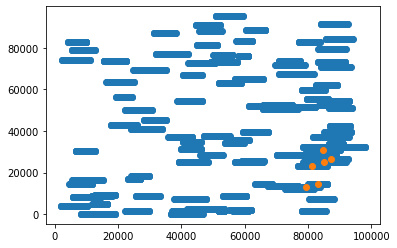

In [18]:
plt.scatter(easting, northing)
plt.scatter(eastOfBest, northOfBest, cmap = "Reds") # the more optimal existing wells as found in previous cell

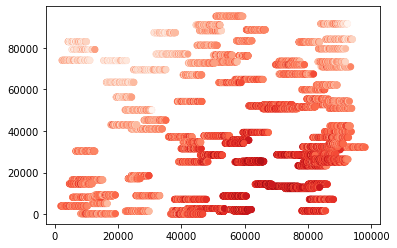

In [19]:
plt.scatter(easting, northing, c = porosity, cmap = "Reds") # just to check the above graph against features again

In [20]:
# find length of each well and append this as column to main dataframe
spreadOfWells = []
for i in range(len(easting)):
    spreadOfWells.append(easting[i].max() - easting[i].min())
df['length of well'] = spreadOfWells

In [21]:
df['average easting']

0     81782.32
1     93221.44
2     13681.29
3     84831.86
4      9038.00
        ...   
95    62570.50
96    19027.67
97    62859.20
98    79389.72
99    65947.32
Name: average easting, Length: 100, dtype: float64

In [22]:
# set containing all the different latitudes where wells exist
northingVals = set()
for n in northing:
    northingVals.add(n[0])

In [23]:
# map: northing vals mapped to list of easting vals from each well
occupiedSpaces = dict()
occupiedSpaces = occupiedSpaces.fromkeys(northingVals)

for key in occupiedSpaces:
    occupiedSpaces[key] = []
    
for i in range (0,len(easting)):
    occupiedSpaces[northing[i][0]].append(easting[i])

In [24]:
#return true if a location already has a well there
def spaceOccupied(e, n):
    if not n in occupiedSpaces:
        return False
    #there is a well somewhere on this latitude so we will check that
    wellsAtNorthing = occupiedSpaces[n]
    for i in range (0, len(wellsAtNorthing)):
        # check for each well if e falls between the max easting and min easting of this
        if wellsAtNorthing[i].min() <= e and wellsAtNorthing[i].max() >= e:
            return True
    return False

In [25]:
# Marco and I assume H is thickness
# E prime = E / (1 - v**2) where E = youngs modulus and v = poissons ratio
# w = (2H / E prime) * p
# w * L = A
# then grab OOIP and RR for wells :) 
def ePrime(E, v):
    return E / (1 - (v ** 2))
E = []
dfYM = df['average youngs modulus'].values
dfPR = df['average poissons ratio'].values
for i in range(0, len(df)):
    E.append(ePrime(dfYM[i], dfPR[i]))
df['average plane strain'] = E
df

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,averagePermeability,average poissons ratio,average youngs modulus,average water saturation,averageOilSaturation,average thickness,average proppant weight,average pump rate,length of well,average plane strain
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,0.02697,0.32662,6.277894e+06,0.081318,0.918682,27.492502,910422.941447,294.800448,7565.0,7.027603e+06
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,0.01507,0.30587,1.085445e+07,0.035204,0.964796,31.828707,728628.013775,288.362177,9643.0,1.197476e+07
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,0.01062,0.34421,5.329992e+06,0.230831,0.769169,4.604195,988860.773545,290.685170,10963.0,6.046368e+06
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,0.02261,0.30560,1.027616e+07,0.071061,0.928939,57.315355,690947.011162,298.807597,10664.0,1.133472e+07
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.00159,0.33157,8.748671e+06,0.093772,0.906228,2.231946,832067.579729,295.943915,7276.0,9.829290e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,0.03251,0.29837,8.963008e+06,0.199008,0.800992,99.653394,734352.239635,289.977042,6941.0,9.838914e+06
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.00090,0.31143,8.770838e+06,0.098419,0.901581,5.000000,718291.597013,301.840799,7255.0,9.712877e+06
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,0.03388,0.29815,8.970672e+06,0.198491,0.801509,100.040793,786816.473580,294.023938,4318.0,9.845909e+06
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,0.02966,0.31488,7.178213e+06,0.074205,0.925795,54.119562,692306.209005,304.578816,8579.0,7.968262e+06


In [26]:
# calculate width and area of each well
# h = thickness, e = plane strain, p = pressure
def width(H, E, P):
    return ((2 * H * P) / E)

dfThick = df['average thickness'].values
dfPS = df['average plane strain'].values
dfPressure = df['average pressure (Pa)'].values
dfLength = df['length of well'].values

W = []
A = []

for i in range(0,len(df)):
    W.append(width(dfThick[i], dfPS[i], dfPressure[i]))
df['average width'] = W

for i in range(0,len(df)):
    A.append(W[i] * dfLength[i])
df['area'] = A

In [27]:
df.columns

Index(['well name', 'average pressure (Pa)', 'recovery factor',
       'formation volume factor', 'oil 1', 'oil 2', 'oil 3', 'oil 4', 'oil 5',
       'oil 6', 'oil 7', 'oil 8', 'oil 9', 'oil 10', 'oil 11', 'oil 12',
       'water 1', 'water 2', 'water 3', 'water 4', 'water 5', 'water 6',
       'water 7', 'water 8', 'water 9', 'water 10', 'water 11', 'water 12',
       'average northing', 'average easting', 'averagePorosity',
       'averagePermeability', 'average poissons ratio',
       'average youngs modulus', 'average water saturation',
       'averageOilSaturation', 'average thickness', 'average proppant weight',
       'average pump rate', 'length of well', 'average plane strain',
       'average width', 'area'],
      dtype='object')

In [28]:
# calculate original oil in place
FORMATION_FACTOR = 1.6
FEET_ACRES = 43560

# A = area (acres), H = reservoir thickness (ft), P = porosity (%), O = oil saturation (%)
def OOIP(A, H, P, O):
    return 7758 * A * H * P * O / (FORMATION_FACTOR * FEET_ACRES) 

dfPor = df['averagePorosity'].values
dfOS = df['averageOilSaturation'].values

# calculate OOIP for each well and then append these values as column to dataframe
ooip = []
for i in range(0,len(df)):
    ooip.append(OOIP(A[i],dfThick[i],dfPor[i],dfOS[i]))
df['OOIP'] = ooip

In [29]:
# calculate recoverable reserves for each well and then append these values as column to main dataframe
rr = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    rr.append(df.iloc[index]["OOIP"] * df.iloc[index]["recovery factor"])
df['recoverable reserves'] = rr

In [30]:
df['recoverable reserves']

0      42742.146117
1      39169.645992
2        939.373412
3     170298.603559
4         41.652356
          ...      
95    401175.750050
96       195.020559
97    252654.749087
98    196913.902533
99    142750.830761
Name: recoverable reserves, Length: 100, dtype: float64

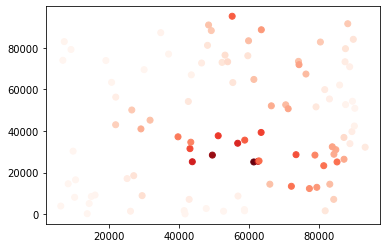

In [31]:
# plot the OOIP for each well, using the midpoint of each well as the location
plt.scatter(df['average easting'], df['average northing'], c = df['OOIP'], cmap = "Reds")

In [32]:
df['recoverable reserves'].values

array([4.27421461e+04, 3.91696460e+04, 9.39373412e+02, 1.70298604e+05,
       4.16523564e+01, 1.64722732e+04, 2.56190208e+05, 5.27290049e+04,
       2.17961689e+05, 1.32406723e+05, 1.04890031e+03, 2.83341290e+04,
       7.24038412e+03, 3.74843469e+04, 1.19556378e+05, 3.24206494e+04,
       2.63900133e+05, 2.19145877e+05, 7.89550529e+02, 4.73204534e+05,
       3.97342040e+02, 2.95855221e+05, 2.53150706e+02, 3.29562325e+04,
       2.80765933e+05, 1.23946484e+05, 3.18571718e+02, 1.65064007e+05,
       1.02709565e+05, 1.31698566e+03, 3.02277718e+05, 5.11305205e+04,
       1.31129177e+05, 1.02973097e+03, 2.10298614e+05, 5.00139789e+04,
       1.60189556e+05, 1.11359483e+05, 6.20439263e+03, 2.67207920e+04,
       1.13747534e+04, 5.76738422e+04, 1.00972837e+05, 6.16794604e+04,
       5.17888287e+05, 8.90670435e+04, 1.37824772e+05, 3.43206571e+04,
       2.49496899e+03, 2.78157849e+03, 2.49194012e+03, 7.43790230e+03,
       1.37017771e+04, 3.75930882e+04, 7.07539882e+03, 5.25516806e+03,
      

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
# split up XY plane into spaces with existing wells and open spaces
northPredict = []
eastPredict = []

northOccupied = []
eastOccupied = []

i = 0
j = 0
for i in range (0, 1000):
    eastTest = i*100
    for j in range(0,1000):
        northTest = j*100
        if spaceOccupied(eastTest,northTest):
            eastOccupied.append(eastTest)
            northOccupied.append(northTest)
        else:
            eastPredict.append(eastTest)
            northPredict.append(northTest)
    
# northPredict and eastPredict are the open spaces that regressions will be run to predict for

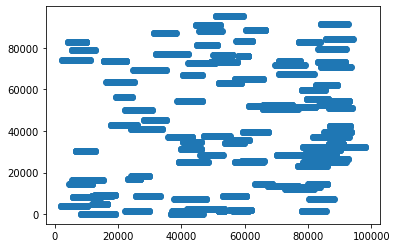

In [35]:
plt.scatter(easting,northing)

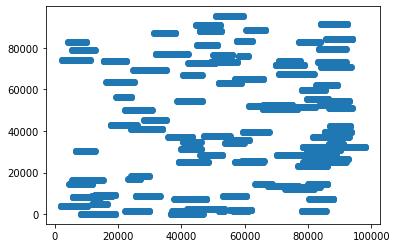

In [36]:
# these are the values that have been removed from the set of possible easting-northing pairs and as you can see,
# they match the locations of the wells
plt.scatter(eastOccupied,northOccupied)

# the predictions will still look like they have been applied to the entire map but no worries, these values have
# already been removed from the data set

In [37]:
# xPredict is set of easting, northing pairs for treeReg to predict on
xPredict = np.array([np.array([eastPredict]).flatten(),np.array([northPredict]).flatten()])
xPredict = xPredict.transpose()

# pulls the easting-northing values for the existing wells.
existingLocations = np.array([np.array([easting]).flatten(),np.array([northing]).flatten()]) # indep var = coordinates
existingLocations = existingLocations.transpose()

# do these constructions once for efficiency because they will be reused many times

In [38]:
# function that runs a regression for a given list of values on the rest of the easting-northing plane
# returns a list of predicted values for each easting-northing pair in xPredict (2-d array)
    
def predictor(predict):
    tree = DecisionTreeRegressor()
    
    # dependent variable is the metric that was passed in
    y = np.array([predict]).flatten()
    y = y.reshape(-1,1)
    
    tree.fit(existingLocations,y)
    
    # predict the thing
    Predict = tree.predict(xPredict)
    #plt.scatter(eastPredict,northPredict, c = Predict, cmap = "Reds")
    return Predict

porosityPred = predictor(porosity)

In [39]:
# comment out for now so it doesn't take forever to run
# plt.scatter(eastPredict,northPredict, c = porosityPred, cmap = "Reds")

In [40]:
# plt.scatter(easting,northing, c = porosity, cmap = "Reds")

In [41]:
permPredict = predictor(permeability)

In [42]:
poissPredict = predictor(poissonRatio)

In [43]:
ymPredict = predictor(youngMod)

In [44]:
wsPredict = predictor(waterSat)

In [45]:
osPredict = predictor(oilSat)

In [46]:
thicknessPredict = predictor(thickness)

In [47]:
propwtPredict = predictor(proppWt)

In [48]:
pumprtPredict = predictor(pumpRt)

In [49]:
pressurePredict = predictor(pressure)

In [50]:
predData = pd.DataFrame()
predData["Easting"] = eastPredict
predData["Northing"] = northPredict
predData["Porosity"] = porosityPred
predData['Permeability'] = permPredict
predData['PoissonRatio'] = poissPredict
predData['YoungsModulus'] = ymPredict
predData['WaterSaturation'] = wsPredict
predData['OilSaturation'] = osPredict
predData['Thickness'] = thicknessPredict
predData['ProppantWeight'] = propwtPredict
predData['PumpRate'] = pumprtPredict
predData['Pressure'] = pressurePredict

In [51]:
porQuant = predData['Porosity'].quantile(.5)
permQuant = predData['Permeability'].quantile(.5)
osQuant = predData['OilSaturation'].quantile(.5)

In [52]:
#75th percentile vals for each
bestWells = predData.query('Porosity >= @porQuant and Permeability >= @permQuant and OilSaturation >= @osQuant')
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure
599,0,59900,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0
600,0,60000,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0
601,0,60100,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0
602,0,60200,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0
603,0,60300,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0
...,...,...,...,...,...,...,...,...,...,...,...,...
991701,99900,46100,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0
991702,99900,46200,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0
991703,99900,46300,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0
991704,99900,46400,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0


In [53]:
# the locations where each of these 3 features are above 75th percentiles
eastBest = bestWells['Easting']
northBest = bestWells['Northing']

# the actual values of these better locations
porBest = bestWells['Porosity']
permBest = bestWells['Permeability']
osBest = bestWells['OilSaturation']

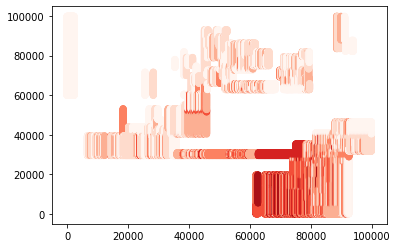

In [54]:
plt.scatter(eastBest,northBest, c = porBest, cmap = "Reds")

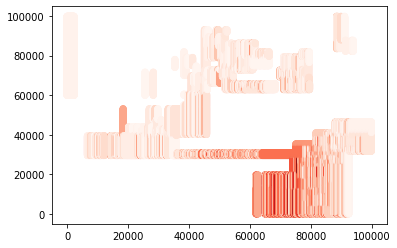

In [55]:
plt.scatter(eastBest, northBest, c=permBest, cmap = "Reds")

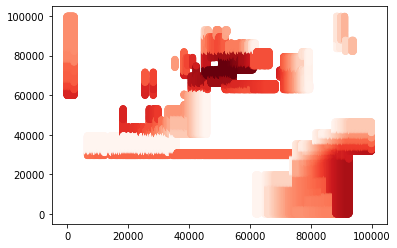

In [56]:
plt.scatter(eastBest, northBest, c = osBest, cmap = "Reds")

In [57]:
EPrimePred = []
bestYM = bestWells['YoungsModulus'].values
bestPR = bestWells['PoissonRatio'].values

for i in range(0,len(bestWells)):
    EPrimePred.append(ePrime(bestYM[i], bestPR[i]))
bestWells['PlaneStrain'] = EPrimePred

/Users/helen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [58]:
# calculate width for each location should a well be placed there
# h = thickness, e = plane strain, p = pressure
widthPred = []
bestThick = bestWells['Thickness'].values
bestPS = bestWells['PlaneStrain'].values
bestPressure = bestWells['Pressure'].values

for i in range(0,len(bestWells)):
    widthPred.append(width(bestThick[i], bestPS[i], bestPressure[i]))
bestWells['Width'] = widthPred

/Users/helen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [59]:
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure,PlaneStrain,Width
599,0,59900,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543
600,0,60000,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543
601,0,60100,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543
602,0,60200,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543
603,0,60300,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991701,99900,46100,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483
991702,99900,46200,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483
991703,99900,46300,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483
991704,99900,46400,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483


In [60]:
# A = area (acres), H = reservoir thickness (ft), P = porosity (%), O = oil saturation (%)
bestOOIP = []
#calculate ooip for these above-50th percentile locations 
bestWidths = bestWells['Width'].values
bestThick = bestWells['Thickness'].values
bestPor = bestWells['Porosity'].values
bestOS = bestWells['OilSaturation'].values
for i in range(0,len(bestWells)):
    #calculate in differentials of 100, because prediction points were spaced 100 units apart
    bestOOIP.append(OOIP(bestWidths[i]*100,bestThick[i],bestPor[i],bestOS[i]))    

In [61]:
bestWells['OOIP'] = bestOOIP

/Users/helen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure,PlaneStrain,Width,OOIP
599,0,59900,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543,77.466512
600,0,60000,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543,77.466512
601,0,60100,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543,77.466512
602,0,60200,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543,77.466512
603,0,60300,0.05,0.011,0.334,8.981690e+06,0.040266,0.959734,5.000000,656934.087039,274.47309,29323042.0,1.010946e+07,29.005543,77.466512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991701,99900,46100,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483,637.456099
991702,99900,46200,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483,637.456099
991703,99900,46300,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483,637.456099
991704,99900,46400,0.05,0.011,0.292,1.118080e+07,0.108404,0.891596,15.565431,762436.212375,298.06186,32403741.0,1.222298e+07,82.529483,637.456099


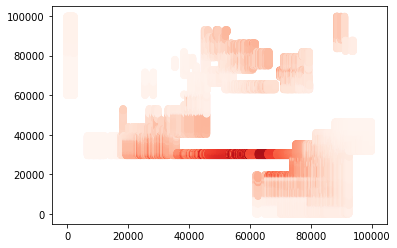

In [63]:
plt.scatter(eastBest,northBest,c = bestOOIP, cmap = "Reds")

In [64]:
# split this dataframe up into smaller dataframes based on northing values
northingVals = bestWells['Northing'].values
northingSet = set(northingVals)

In [65]:
groupByNorthing = []
for n in northingSet:
    groupByNorthing.append(bestWells.query('Northing == @n'))

In [66]:
# divide values into contiguous ranges where a new well can be placed
rangesByNorthing = dict()
for well in groupByNorthing:
    e = well['Easting'].values
    ranges = []
    start = e[0]
    for i in range(0,len(e)-1):
        # allowance of 1000 ft between points
        if(e[i+1]-e[i]>1000):
            # only keep ranges that are at least 7000 ft long (short ranges are pointless)
            if(e[i]-start >= 7000):
                ranges.append((start,e[i]))
            start = e[i+1]
    if(len(ranges)>0):
        rangesByNorthing[well.iloc[0]['Northing']] = ranges

In [67]:
# "continguous" ranges
rangesByNorthing

{63500.0: [(51900, 68300)],
 12300.0: [(64800, 72700)],
 71700.0: [(45100, 54600)],
 75800.0: [(50900, 66300)],
 79900.0: [(49500, 66300)],
 84000.0: [(53000, 61800)],
 32800.0: [(14300, 33100)],
 36900.0: [(14300, 33100)],
 41000.0: [(34100, 45800)],
 45100.0: [(32600, 45800)],
 65600.0: [(51900, 68300)],
 14400.0: [(68600, 80000)],
 69700.0: [(47300, 54600)],
 77900.0: [(50900, 66300)],
 82000.0: [(53000, 66300)],
 30800.0: [(14300, 33100)],
 34900.0: [(14300, 33100)],
 39000.0: [(14300, 33100)],
 43100.0: [(26600, 45800)],
 63600.0: [(51900, 68300)],
 71800.0: [(45100, 54600)],
 75900.0: [(50900, 66300)],
 80000.0: [(49500, 66300)],
 32900.0: [(14300, 33100)],
 37000.0: [(14300, 33100)],
 41100.0: [(25800, 45800)],
 45200.0: [(35200, 45800)],
 65700.0: [(51900, 68300)],
 69800.0: [(47300, 54600)],
 78000.0: [(50900, 66300)],
 82100.0: [(53000, 61800)],
 30900.0: [(14300, 33100)],
 35000.0: [(14300, 33100)],
 39100.0: [(14300, 33100)],
 43200.0: [(32600, 45800)],
 63700.0: [(51900, 6